<a href="https://colab.research.google.com/github/juanfherrer/Optimizaci-n/blob/main/Resolucion_de_problema.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

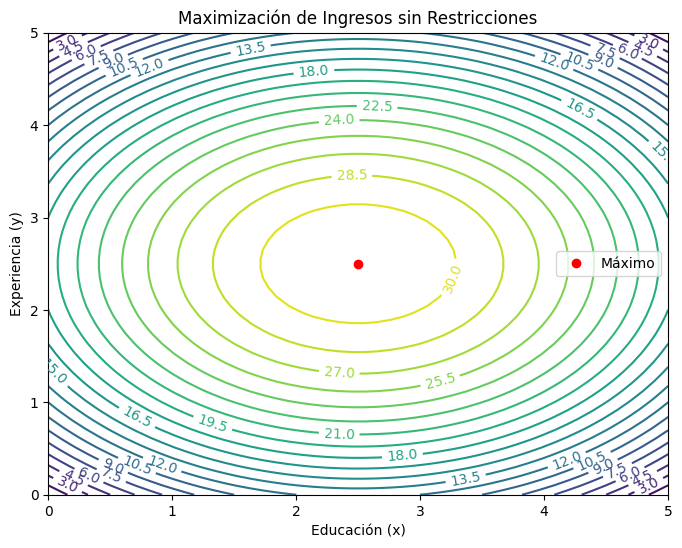

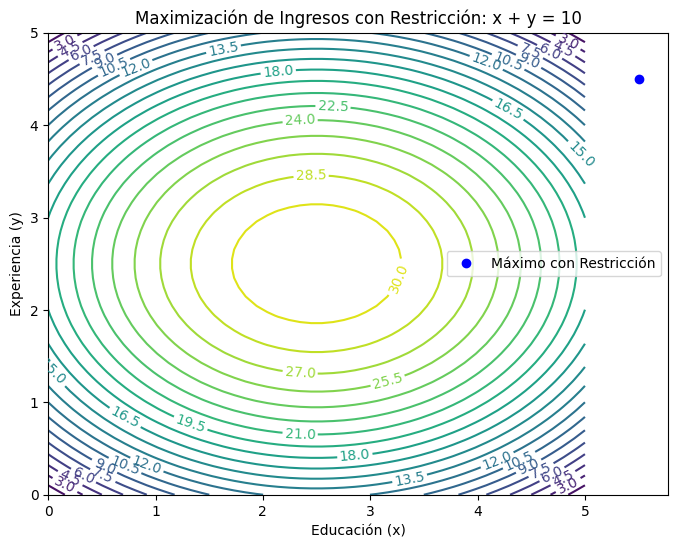

Resultado sin restricciones (máximo): [2.49999998 2.49999999]
Resultado con restricciones (máximo bajo x + y = 10): [5.50000569 4.49999431]


In [1]:
# 🚀 Importamos las librerías necesarias
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

# --- 💡 Definimos la función de ingresos ---
def ingresos(x, y):
    return 10*x + 15*y - 2*x**2 - 3*y**2

# --- 🎯 Objetivo: Maximización sin restricciones ---

# Función objetivo (negativa para minimizar)
def objective_no_constraints(vars):
    x, y = vars
    return -(10*x + 15*y - 2*x**2 - 3*y**2)

# Punto inicial para la optimización
initial_guess = [1, 1]

# Resolución del problema sin restricciones
result_no_constraints = opt.minimize(objective_no_constraints, initial_guess)

# --- 📈 Graficamos los resultados de la maximización sin restricciones ---
x_vals = np.linspace(0, 5, 50)
y_vals = np.linspace(0, 5, 50)
X, Y = np.meshgrid(x_vals, y_vals)
Z = 10*X + 15*Y - 2*X**2 - 3*Y**2

plt.figure(figsize=(8,6))
cp = plt.contour(X, Y, Z, 20, cmap='viridis')
plt.clabel(cp, inline=True, fontsize=10)
plt.plot(result_no_constraints.x[0], result_no_constraints.x[1], 'ro', label='Máximo')
plt.xlabel('Educación (x)')
plt.ylabel('Experiencia (y)')
plt.title('Maximización de Ingresos sin Restricciones')
plt.legend()
plt.show()

# --- 🎯 Optimización con restricciones: Método de Lagrange ---
# Definimos la función con la restricción x + y = 10
def objective_with_constraints(vars):
    x, y = vars
    return -(10*x + 15*y - 2*x**2 - 3*y**2)  # Maximización de la misma función

# Restricción: x + y = 10
constraint = {'type': 'eq', 'fun': lambda vars: vars[0] + vars[1] - 10}

# Resolución del problema con restricción
result_with_constraints = opt.minimize(objective_with_constraints, initial_guess, constraints=constraint)

# --- 📈 Graficamos los resultados de la optimización con restricciones ---
plt.figure(figsize=(8,6))
cp = plt.contour(X, Y, Z, 20, cmap='viridis')
plt.clabel(cp, inline=True, fontsize=10)
plt.plot(result_with_constraints.x[0], result_with_constraints.x[1], 'bo', label='Máximo con Restricción')
plt.xlabel('Educación (x)')
plt.ylabel('Experiencia (y)')
plt.title('Maximización de Ingresos con Restricción: x + y = 10')
plt.legend()
plt.show()

# --- 📊 Resultados ---
print("Resultado sin restricciones (máximo):", result_no_constraints.x)
print("Resultado con restricciones (máximo bajo x + y = 10):", result_with_constraints.x)
